In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('./필수과제1_계측데이터.xlsx')

In [3]:
df2=pd.read_excel('./필수과제1_공정진행데이터.xlsx')

In [4]:
df.head()

,Stepseq,Step_Description,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low
0,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.03,0.027
1,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.03,0.027
2,AB000585,Gate etch 1st ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0302,0.033,0.03,0.027
3,AB000585,Gate etch 1st ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0306,0.033,0.03,0.027
4,AB000585,Gate etch 1st ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0285,0.033,0.03,0.027


In [5]:
df2.head()

,Stepseq,Step_Description,Type,Recipe ID,Tkin_time,Lot ID,Wafer ID,Equipment ID,Chaber ID
0,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-08,KZABC.1,5,EUCP01,1
1,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-09,KZABC.1,14,EUCP01,1
2,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-10,KZABC.1,9,EUCP01,1
3,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-11,KZA59.1,2,EUCP01,1
4,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-12,KZA59.1,15,EUCP01,1


In [6]:
df['Step_Description'].unique()

array(['Gate etch 1st ACI CD', 'Gate etch 2nd ACI CD'], dtype=object)

In [7]:
df2['Step_Description'].unique()

array(['Gate etch 1st', 'Gate etch 2nd'], dtype=object)

In [8]:
print(df2['Lot ID'].nunique())
print(df2['Lot ID'].nunique())


24
24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Stepseq           207 non-null    object        
 1   Step_Description  207 non-null    object        
 2   Tkin_time         207 non-null    datetime64[ns]
 3   Lot ID            207 non-null    object        
 4   Wafer ID          207 non-null    int64         
 5   Item_id           207 non-null    object        
 6   subitem_id        207 non-null    object        
 7   Value(Å)          207 non-null    float64       
 8   Spec high         207 non-null    float64       
 9   Target            207 non-null    float64       
 10  Spec low          207 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 17.9+ KB


In [10]:
df.isna().sum()

Stepseq             0
Step_Description    0
Tkin_time           0
Lot ID              0
Wafer ID            0
Item_id             0
subitem_id          0
Value(Å)            0
Spec high           0
Target              0
Spec low            0
dtype: int64

In [11]:
df2.isna().sum()

Stepseq             0
Step_Description    0
Type                0
Recipe ID           0
Tkin_time           0
Lot ID              0
Wafer ID            0
Equipment ID        0
Chaber ID           0
dtype: int64

## B000580 Gate etch 1st step의 CD1 ACI CD, AB000620 Gate etch 2nd step의 CD1 ACI CD 데이터를 value, spec high, target, spec low와 함께 플로팅

In [12]:
df.describe(include='object')

,Stepseq,Step_Description,Lot ID,Item_id,subitem_id
count,207,207,207,207,207
unique,2,2,24,2,1
top,AB000635,Gate etch 2nd ACI CD,KZL02.1,CD1,average
freq,138,138,12,138,207


In [13]:
df['Stepseq'].unique()

array(['AB000585', 'AB000635'], dtype=object)

In [14]:
df['Step_Description'].unique()

array(['Gate etch 1st ACI CD', 'Gate etch 2nd ACI CD'], dtype=object)

In [15]:
df['Item_id'].unique()

array(['CD1', 'CD2'], dtype=object)

In [16]:
# subitem_id
df['subitem_id'].unique()

array(['average'], dtype=object)

In [17]:
df.shape

(207, 11)

In [18]:
df_1st = df[df['Step_Description'] == 'Gate etch 1st ACI CD']

In [19]:
df_1st

,Stepseq,Step_Description,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low
0,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.03,0.027
1,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.03,0.027
2,AB000585,Gate etch 1st ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0302,0.033,0.03,0.027
3,AB000585,Gate etch 1st ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0306,0.033,0.03,0.027
4,AB000585,Gate etch 1st ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0285,0.033,0.03,0.027
...,...,...,...,...,...,...,...,...,...,...,...
64,AB000585,Gate etch 1st ACI CD,2022-02-13,KZGFT.1,12,CD1,average,0.0293,0.033,0.03,0.027
65,AB000585,Gate etch 1st ACI CD,2022-02-15,KZGFT.1,4,CD1,average,0.0279,0.033,0.03,0.027
66,AB000585,Gate etch 1st ACI CD,2022-02-16,KZR65.1,1,CD1,average,0.0291,0.033,0.03,0.027
67,AB000585,Gate etch 1st ACI CD,2022-02-17,KZR65.1,6,CD1,average,0.0308,0.033,0.03,0.027


In [20]:
df_1st.shape

(69, 11)

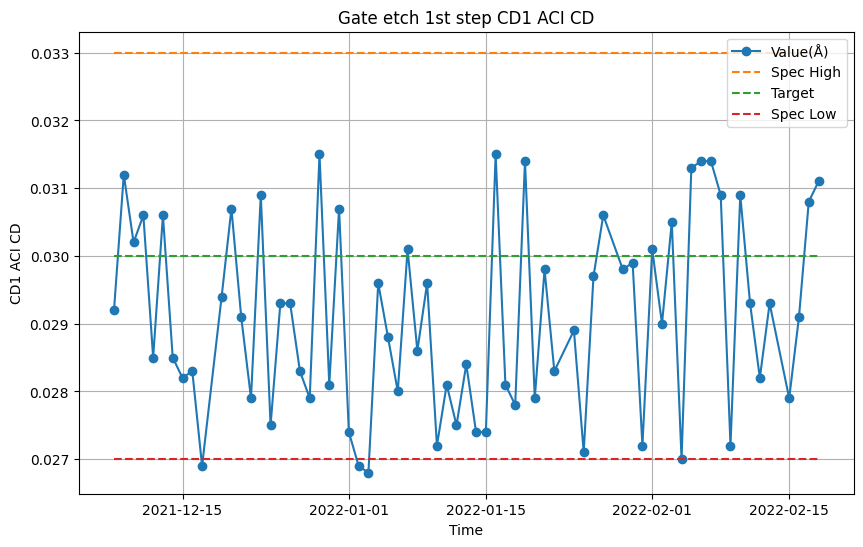

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_1st['Tkin_time'], df_1st['Value(Å)'], label='Value(Å)', marker='o')
plt.plot(df_1st['Tkin_time'], df_1st['Spec high'], label='Spec High', linestyle='--')
plt.plot(df_1st['Tkin_time'], df_1st['Target'], label='Target', linestyle='--')
plt.plot(df_1st['Tkin_time'], df_1st['Spec low'], label='Spec Low', linestyle='--')
plt.xlabel('Time')
plt.ylabel('CD1 ACI CD')
plt.title('Gate etch 1st step CD1 ACI CD')
plt.legend()
plt.grid(True)

plt.show()


In [22]:
df_2nd=df[df['Step_Description']=='Gate etch 2nd ACI CD']

In [23]:
df_2nd

,Stepseq,Step_Description,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low
69,AB000635,Gate etch 2nd ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0251,0.029,0.026,0.023
70,AB000635,Gate etch 2nd ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0270,0.029,0.026,0.023
71,AB000635,Gate etch 2nd ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0263,0.029,0.026,0.023
72,AB000635,Gate etch 2nd ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0268,0.029,0.026,0.023
73,AB000635,Gate etch 2nd ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0246,0.029,0.026,0.023
...,...,...,...,...,...,...,...,...,...,...,...
202,AB000635,Gate etch 2nd ACI CD,2022-02-13,KZGFT.1,12,CD2,average,0.0213,0.024,0.022,0.020
203,AB000635,Gate etch 2nd ACI CD,2022-02-15,KZGFT.1,4,CD2,average,0.0217,0.024,0.022,0.020
204,AB000635,Gate etch 2nd ACI CD,2022-02-16,KZR65.1,1,CD2,average,0.0224,0.024,0.022,0.020
205,AB000635,Gate etch 2nd ACI CD,2022-02-17,KZR65.1,6,CD2,average,0.0229,0.024,0.022,0.020


In [24]:
df_2nd['Stepseq'].unique()

array(['AB000635'], dtype=object)

In [25]:
df_2nd['Item_id'].unique()

array(['CD1', 'CD2'], dtype=object)

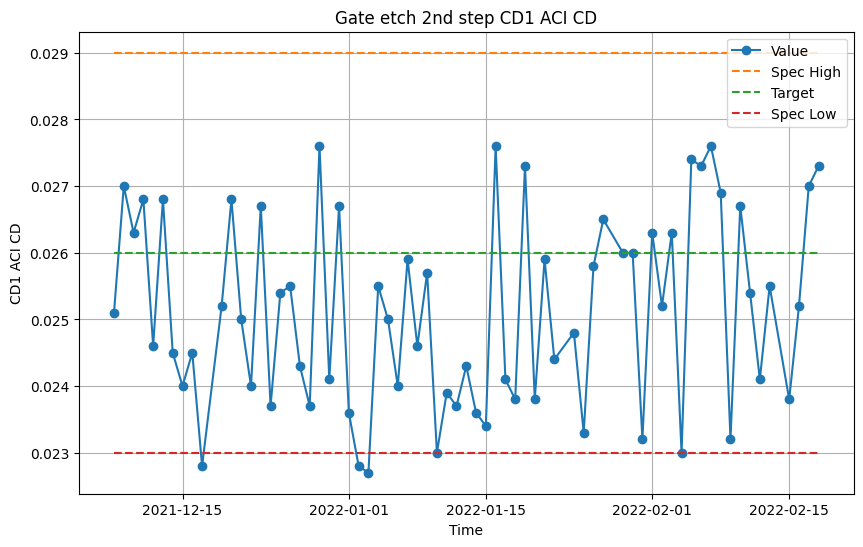

In [26]:
# Filter the DataFrame for Item_id equal to 'CD1'
df_cd1 = df_2nd[df_2nd['Item_id'] == 'CD1']

plt.figure(figsize=(10, 6))
plt.plot(df_cd1['Tkin_time'], df_cd1['Value(Å)'], label='Value', marker='o')
plt.plot(df_cd1['Tkin_time'], df_cd1['Spec high'], label='Spec High', linestyle='--')
plt.plot(df_cd1['Tkin_time'], df_cd1['Target'], label='Target', linestyle='--')
plt.plot(df_cd1['Tkin_time'], df_cd1['Spec low'], label='Spec Low', linestyle='--')

plt.xlabel('Time')
plt.ylabel('CD1 ACI CD')
plt.title('Gate etch 2nd step CD1 ACI CD')
plt.legend()
plt.grid(True)
plt.show()


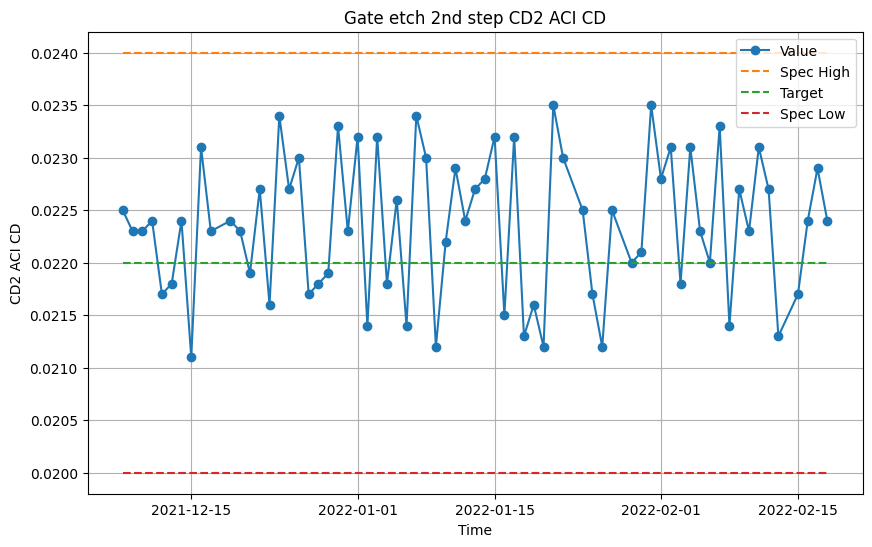

In [27]:
# Filter the DataFrame for Item_id equal to 'CD2'
df_cd2 = df_2nd[df_2nd['Item_id'] == 'CD2']

plt.figure(figsize=(10, 6))
plt.plot(df_cd2['Tkin_time'], df_cd2['Value(Å)'],  label='Value', marker='o')
plt.plot(df_cd2['Tkin_time'], df_cd2['Spec high'], label='Spec High', linestyle='--')
plt.plot(df_cd2['Tkin_time'], df_cd2['Target'], label='Target', linestyle='--')
plt.plot(df_cd2['Tkin_time'], df_cd2['Spec low'], label='Spec Low', linestyle='--')

plt.xlabel('Time')
plt.ylabel('CD2 ACI CD')
plt.title('Gate etch 2nd step CD2 ACI CD')
plt.legend()
plt.grid(True)
plt.show()


## 2) 각 Lot 마다의 평균 Gate ACI CD 를 value, spec high, target, spec low 와 함께 plotting 해보세요. (분산형 or 꺾은선형) (* 평균값 처리
작업 효율화 위해서는 피벗테이블 활용 필요)

In [28]:
df['Lot ID'].unique()

array(['KZABC.1', 'KZA59.1', 'KZB3J.1', 'KZC8G.1', 'KZ9GH.1', 'KZL02.1',
       'KZJBG.1', 'KZ317.1', 'KZBER.1', 'KZGPC.1', 'LZKLK.1', 'KZKLK.1',
       'KZGDO.1', 'KZ379.1', 'KZPO9.1', 'KZJTY.1', 'KZMI4.1', 'KZQWE.1',
       'KZ987.1', 'KZ0UI.1', 'KZD89.1', 'KZP12.1', 'KZGFT.1', 'KZR65.1'],
      dtype=object)

In [29]:
df.columns

Index(['Stepseq', 'Step_Description', 'Tkin_time', 'Lot ID', 'Wafer ID',
       'Item_id', 'subitem_id', 'Value(Å)', 'Spec high', 'Target', 'Spec low'],
      dtype='object')

In [30]:
filter_df=df_1st.pivot_table(index='Lot ID', values=[ 'Value(Å)', 'Spec high', 'Target', 'Spec low'],aggfunc='mean').reset_index()
filter_df

,Lot ID,Spec high,Spec low,Target,Value(Å)
0,KZ0UI.1,0.033,0.027,0.03,0.029600
1,KZ317.1,0.033,0.027,0.03,0.030100
2,KZ379.1,0.033,0.027,0.03,0.027733
3,KZ987.1,0.033,0.027,0.03,0.028767
4,KZ9GH.1,0.033,0.027,0.03,0.029900
5,KZA59.1,0.033,0.027,0.03,0.029900
6,KZABC.1,0.033,0.027,0.03,0.030200
7,KZB3J.1,0.033,0.027,0.03,0.028333
8,KZBER.1,0.033,0.027,0.03,0.027033
9,KZC8G.1,0.033,0.027,0.03,0.028150


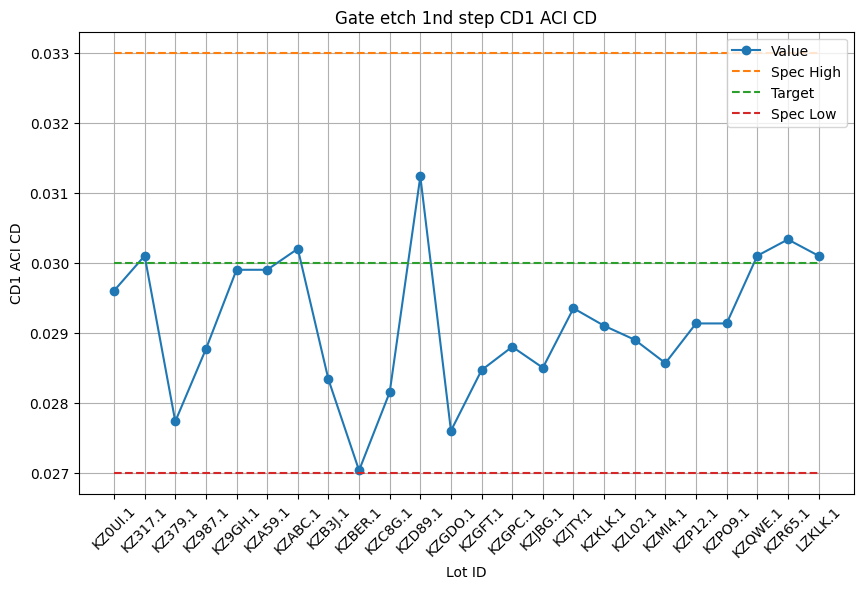

In [31]:

plt.figure(figsize=(10, 6))
plt.plot(filter_df['Lot ID'], filter_df['Value(Å)'], label='Value', marker='o')
plt.plot(filter_df['Lot ID'], filter_df['Spec high'], label='Spec High', linestyle='--')
plt.plot(filter_df['Lot ID'], filter_df['Target'], label='Target', linestyle='--')
plt.plot(filter_df['Lot ID'], filter_df['Spec low'], label='Spec Low', linestyle='--')

plt.xlabel('Lot ID')
plt.ylabel('CD1 ACI CD')
plt.xticks(rotation=45)
plt.title('Gate etch 1nd step CD1 ACI CD')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
filter_df2=df_cd1.pivot_table(index='Lot ID', values=[ 'Value(Å)', 'Spec high', 'Target', 'Spec low'],aggfunc='mean').reset_index()
filter_df2

,Lot ID,Spec high,Spec low,Target,Value(Å)
0,KZ0UI.1,0.029,0.023,0.026,0.025567
1,KZ317.1,0.029,0.023,0.026,0.026133
2,KZ379.1,0.029,0.023,0.026,0.023767
3,KZ987.1,0.029,0.023,0.026,0.024900
4,KZ9GH.1,0.029,0.023,0.026,0.025900
5,KZA59.1,0.029,0.023,0.026,0.026067
6,KZABC.1,0.029,0.023,0.026,0.026133
7,KZB3J.1,0.029,0.023,0.026,0.024333
8,KZBER.1,0.029,0.023,0.026,0.023033
9,KZC8G.1,0.029,0.023,0.026,0.024000


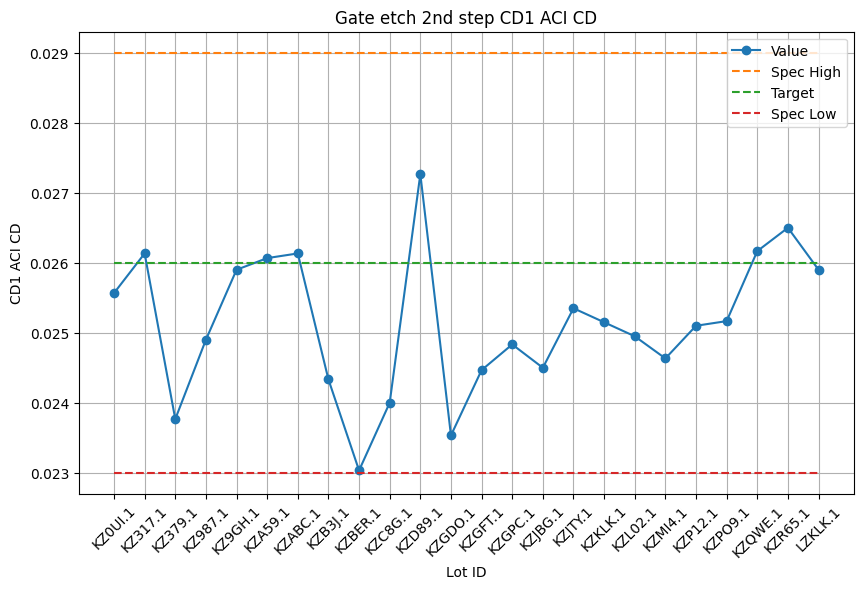

In [33]:

plt.figure(figsize=(10, 6))
plt.plot(filter_df2['Lot ID'], filter_df2['Value(Å)'], label='Value', marker='o')
plt.plot(filter_df2['Lot ID'], filter_df2['Spec high'], label='Spec High', linestyle='--')
plt.plot(filter_df2['Lot ID'], filter_df2['Target'], label='Target', linestyle='--')
plt.plot(filter_df2['Lot ID'], filter_df2['Spec low'], label='Spec Low', linestyle='--')

plt.xlabel('Lot ID')
plt.ylabel('CD1 ACI CD')
plt.xticks(rotation=45)
plt.title('Gate etch 2nd step CD1 ACI CD')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
filter_df3=df_cd2.pivot_table(index='Lot ID', values=[ 'Value(Å)', 'Spec high', 'Target', 'Spec low'],aggfunc='mean').reset_index()
filter_df3

,Lot ID,Spec high,Spec low,Target,Value(Å)
0,KZ0UI.1,0.024,0.02,0.022,0.022400
1,KZ317.1,0.024,0.02,0.022,0.022500
2,KZ379.1,0.024,0.02,0.022,0.022900
3,KZ987.1,0.024,0.02,0.022,0.023133
4,KZ9GH.1,0.024,0.02,0.022,0.022100
5,KZA59.1,0.024,0.02,0.022,0.021967
6,KZABC.1,0.024,0.02,0.022,0.022367
7,KZB3J.1,0.024,0.02,0.022,0.022200
8,KZBER.1,0.024,0.02,0.022,0.022600
9,KZC8G.1,0.024,0.02,0.022,0.022350


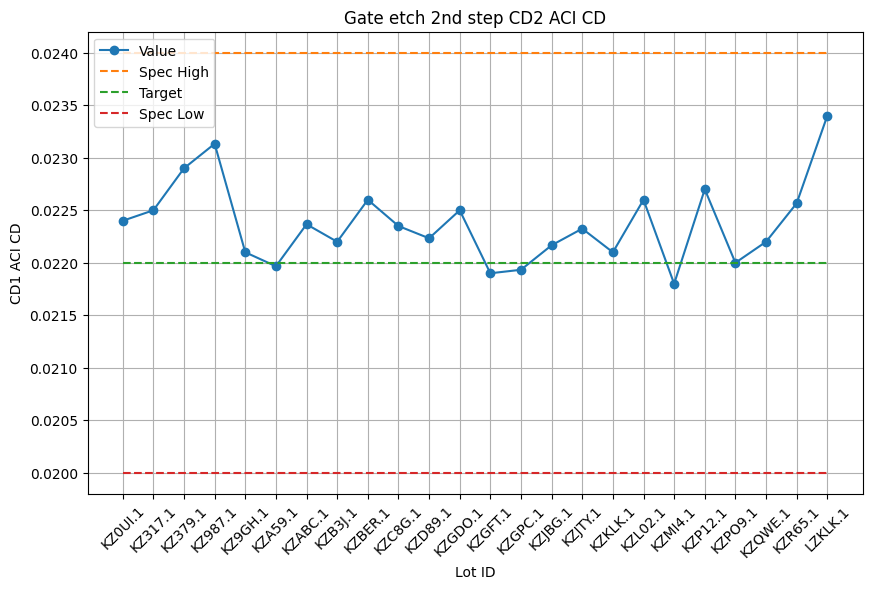

In [35]:

plt.figure(figsize=(10, 6))
plt.plot(filter_df3['Lot ID'], filter_df3['Value(Å)'], label='Value', marker='o')
plt.plot(filter_df3['Lot ID'], filter_df3['Spec high'], label='Spec High', linestyle='--')
plt.plot(filter_df3['Lot ID'], filter_df3['Target'], label='Target', linestyle='--')
plt.plot(filter_df3['Lot ID'], filter_df3['Spec low'], label='Spec Low', linestyle='--')

plt.xlabel('Lot ID')
plt.ylabel('CD1 ACI CD')
plt.xticks(rotation=45)
plt.title('Gate etch 2nd step CD2 ACI CD')
plt.legend()
plt.grid(True)
plt.show()

## 3) **Equipment & Chamber data 를 묶어 표현한 후 설비&챔버 별로 Gate ACI CD 를 plotting 해보세요. (상자 수염 box plot 형)**

In [36]:
df2.columns

Index(['Stepseq', 'Step_Description', 'Type', 'Recipe ID', 'Tkin_time',
       'Lot ID', 'Wafer ID', 'Equipment ID', 'Chaber ID'],
      dtype='object')

In [54]:
df2.head()

,Stepseq,Step_Description,Type,Recipe ID,Tkin_time,Lot ID,Wafer ID,Equipment ID,Chaber ID
0,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-08,KZABC.1,5,EUCP01,1
1,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-09,KZABC.1,14,EUCP01,1
2,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-10,KZABC.1,9,EUCP01,1
3,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-11,KZA59.1,2,EUCP01,1
4,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-12,KZA59.1,15,EUCP01,1


In [78]:
df2[df2['Step_Description']=='Gate etch 1st']['Equip_Chamber'].unique()

array(['EUCP01_1', 'EUCP01_2', 'EUCP02_3', 'EUCP03_2', 'EUCP03_3'],
      dtype=object)

In [56]:
df.head()

,Stepseq,Step_Description,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low
0,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.03,0.027
1,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.03,0.027
2,AB000585,Gate etch 1st ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0302,0.033,0.03,0.027
3,AB000585,Gate etch 1st ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0306,0.033,0.03,0.027
4,AB000585,Gate etch 1st ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0285,0.033,0.03,0.027


In [44]:
print(df.shape)
print(df2.shape)

(207, 11)
(138, 9)


In [45]:
print(df['Lot ID'].nunique())
print(df2['Lot ID'].nunique())
print(df['Wafer ID'].nunique())
print(df2['Wafer ID'].nunique())

24
24
15
15


In [46]:
df2['Equip_Chamber'] = df2['Equipment ID'] + '_' + df2['Chaber ID'].astype(str)


In [47]:
df.head()

,Stepseq,Step_Description,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low
0,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.03,0.027
1,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.03,0.027
2,AB000585,Gate etch 1st ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0302,0.033,0.03,0.027
3,AB000585,Gate etch 1st ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0306,0.033,0.03,0.027
4,AB000585,Gate etch 1st ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0285,0.033,0.03,0.027


In [68]:
df2.head()

,Stepseq,Step_Description,Type,Recipe ID,Tkin_time,Lot ID,Wafer ID,Equipment ID,Chaber ID,Equip_Chamber
0,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-08,KZABC.1,5,EUCP01,1,EUCP01_1
1,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-09,KZABC.1,14,EUCP01,1,EUCP01_1
2,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-10,KZABC.1,9,EUCP01,1,EUCP01_1
3,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-11,KZA59.1,2,EUCP01,1,EUCP01_1
4,AB000580,Gate etch 1st,Etch,PEICPPC500,2021-12-12,KZA59.1,15,EUCP01,1,EUCP01_1


In [51]:
df2['Equip_Chamber'] = df2['Equipment ID'] + '_' + df2['Chaber ID'].astype(str)


In [114]:
df2_selected = df2[['Lot ID', 'Wafer ID', 'Equipment ID', 'Chaber ID','Equip_Chamber','Step_Description','Tkin_time']]


merge_df = pd.merge(df, df2_selected, on=['Lot ID', 'Wafer ID'], how='inner')


In [100]:
df_unique = df.drop_duplicates(subset=['Lot ID', 'Wafer ID', 'Tkin_time'])
df2_selected_unique = df2_selected.drop_duplicates(subset=['Lot ID', 'Wafer ID', 'Tkin_time'])

merge_df = pd.merge(df_unique, df2_selected_unique, on=['Lot ID', 'Wafer ID', 'Tkin_time'], how='inner')

print(f"df_unique length: {len(df_unique)}")
print(f"df2_selected_unique length: {len(df2_selected_unique)}")
print(f"merge_df length: {len(merge_df)}")

df_unique length: 69
df2_selected_unique length: 69
merge_df length: 69


In [101]:
merge_df.

,Stepseq,Step_Description_x,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low,Equipment ID,Chaber ID,Equip_Chamber,Step_Description_y
0,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.03,0.027,EUCP01,1,EUCP01_1,Gate etch 1st
1,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.03,0.027,EUCP01,1,EUCP01_1,Gate etch 1st
2,AB000585,Gate etch 1st ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0302,0.033,0.03,0.027,EUCP01,1,EUCP01_1,Gate etch 1st
3,AB000585,Gate etch 1st ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0306,0.033,0.03,0.027,EUCP01,1,EUCP01_1,Gate etch 1st
4,AB000585,Gate etch 1st ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0285,0.033,0.03,0.027,EUCP01,1,EUCP01_1,Gate etch 1st


In [102]:
merge_df.shape

(69, 15)

In [103]:
merge_df.isna().sum()

Stepseq               0
Step_Description_x    0
Tkin_time             0
Lot ID                0
Wafer ID              0
Item_id               0
subitem_id            0
Value(Å)              0
Spec high             0
Target                0
Spec low              0
Equipment ID          0
Chaber ID             0
Equip_Chamber         0
Step_Description_y    0
dtype: int64

In [104]:
merge_df.describe(include='object')

,Stepseq,Step_Description_x,Lot ID,Item_id,subitem_id,Equipment ID,Equip_Chamber,Step_Description_y
count,69,69,69,69,69,69,69,69
unique,1,1,24,1,1,3,5,1
top,AB000585,Gate etch 1st ACI CD,KZL02.1,CD1,average,EUCP02,EUCP02_3,Gate etch 1st
freq,69,69,4,69,69,25,25,69


In [105]:
merge_df['Step_Description_y'].unique()

array(['Gate etch 1st'], dtype=object)

In [106]:
df1st=merge_df[merge_df['Step_Description_y']=='Gate etch 1st']
df1st.describe(include='object')

,Stepseq,Step_Description_x,Lot ID,Item_id,subitem_id,Equipment ID,Equip_Chamber,Step_Description_y
count,69,69,69,69,69,69,69,69
unique,1,1,24,1,1,3,5,1
top,AB000585,Gate etch 1st ACI CD,KZL02.1,CD1,average,EUCP02,EUCP02_3,Gate etch 1st
freq,69,69,4,69,69,25,25,69


<Figure size 1200x600 with 0 Axes>

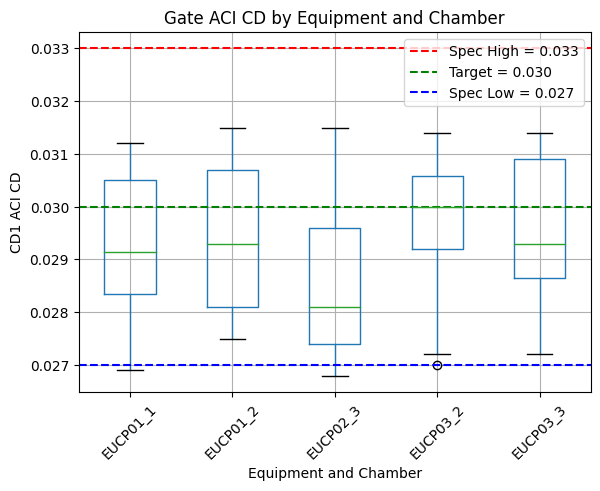

In [107]:
plt.figure(figsize=(12, 6))
df1st.boxplot(column='Value(Å)', by='Equip_Chamber')
plt.title('Gate ACI CD by Equipment and Chamber')
plt.suptitle('')
plt.xlabel('Equipment and Chamber')
plt.ylabel('CD1 ACI CD')
plt.xticks(rotation=45)

spec_high = 0.033
target = 0.03
spec_low = 0.027

plt.axhline(spec_high, color='r', linestyle='--', label=f'Spec High = {spec_high:.3f}')
plt.axhline(target, color='g', linestyle='--', label=f'Target = {target:.3f}')
plt.axhline(spec_low, color='b', linestyle='--', label=f'Spec Low = {spec_low:.3f}')

plt.legend()

plt.show()

In [108]:
df2st=merge_df[merge_df['Step_Description_y']=='Gate etch 2nd']
df2st.head()

,Stepseq,Step_Description_x,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low,Equipment ID,Chaber ID,Equip_Chamber,Step_Description_y


In [116]:
# 'Gate etch 2nd' 데이터를 확인합니다.
gate_etch_2nd_df2 = df2_selected[df2_selected['Step_Description'] == 'Gate etch 2nd']
gate_etch_2nd_df2


,Lot ID,Wafer ID,Equipment ID,Chaber ID,Equip_Chamber,Step_Description,Tkin_time
69,KZABC.1,5,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-08
70,KZABC.1,14,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-09
71,KZABC.1,9,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-10
72,KZA59.1,2,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-11
73,KZA59.1,15,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-12
...,...,...,...,...,...,...,...
133,KZGFT.1,12,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-13
134,KZGFT.1,4,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-15
135,KZR65.1,1,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-16
136,KZR65.1,6,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-17


In [111]:
gate_etch_2nd_df2

,Lot ID,Wafer ID,Equipment ID,Chaber ID,Equip_Chamber,Step_Description,Tkin_time
69,KZABC.1,5,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-08
70,KZABC.1,14,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-09
71,KZABC.1,9,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-10
72,KZA59.1,2,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-11
73,KZA59.1,15,ESTK01,1,ESTK01_1,Gate etch 2nd,2021-12-12
...,...,...,...,...,...,...,...
133,KZGFT.1,12,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-13
134,KZGFT.1,4,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-15
135,KZR65.1,1,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-16
136,KZR65.1,6,ESTK13,2,ESTK13_2,Gate etch 2nd,2022-02-17


In [143]:
merge_df = pd.merge(df, df2_selected, on=['Lot ID', 'Wafer ID', 'Tkin_time'], how='inner')

gate_etch_2nd_merge = merge_df[merge_df['Step_Description_y'] == 'Gate etch 2nd']
print(gate_etch_2nd_merge)


      Stepseq    Step_Description_x  Tkin_time   Lot ID  Wafer ID Item_id   
1    AB000585  Gate etch 1st ACI CD 2021-12-08  KZABC.1         5     CD1  \
3    AB000635  Gate etch 2nd ACI CD 2021-12-08  KZABC.1         5     CD1   
5    AB000635  Gate etch 2nd ACI CD 2021-12-08  KZABC.1         5     CD2   
7    AB000585  Gate etch 1st ACI CD 2021-12-09  KZABC.1        14     CD1   
9    AB000635  Gate etch 2nd ACI CD 2021-12-09  KZABC.1        14     CD1   
..        ...                   ...        ...      ...       ...     ...   
405  AB000635  Gate etch 2nd ACI CD 2022-02-17  KZR65.1         6     CD1   
407  AB000635  Gate etch 2nd ACI CD 2022-02-17  KZR65.1         6     CD2   
409  AB000585  Gate etch 1st ACI CD 2022-02-18  KZR65.1         5     CD1   
411  AB000635  Gate etch 2nd ACI CD 2022-02-18  KZR65.1         5     CD1   
413  AB000635  Gate etch 2nd ACI CD 2022-02-18  KZR65.1         5     CD2   

    subitem_id  Value(Å)  Spec high  Target  Spec low Equipment ID  Chaber 

In [144]:
gate_etch_2nd_merge

,Stepseq,Step_Description_x,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low,Equipment ID,Chaber ID,Equip_Chamber,Step_Description_y
1,AB000585,Gate etch 1st ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0292,0.033,0.030,0.027,ESTK01,1,ESTK01_1,Gate etch 2nd
3,AB000635,Gate etch 2nd ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0251,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
5,AB000635,Gate etch 2nd ACI CD,2021-12-08,KZABC.1,5,CD2,average,0.0225,0.024,0.022,0.020,ESTK01,1,ESTK01_1,Gate etch 2nd
7,AB000585,Gate etch 1st ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0312,0.033,0.030,0.027,ESTK01,1,ESTK01_1,Gate etch 2nd
9,AB000635,Gate etch 2nd ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0270,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,AB000635,Gate etch 2nd ACI CD,2022-02-17,KZR65.1,6,CD1,average,0.0270,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd
407,AB000635,Gate etch 2nd ACI CD,2022-02-17,KZR65.1,6,CD2,average,0.0229,0.024,0.022,0.020,ESTK13,2,ESTK13_2,Gate etch 2nd
409,AB000585,Gate etch 1st ACI CD,2022-02-18,KZR65.1,5,CD1,average,0.0311,0.033,0.030,0.027,ESTK13,2,ESTK13_2,Gate etch 2nd
411,AB000635,Gate etch 2nd ACI CD,2022-02-18,KZR65.1,5,CD1,average,0.0273,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd


In [131]:
gate_etch_2nd_merge.shape

(207, 15)

In [149]:
gate_etch_2nd_merge=gate_etch_2nd_merge[
    (gate_etch_2nd_merge['Item_id'] == 'CD1') & 
    (gate_etch_2nd_merge['Step_Description_x'] == 'Gate etch 2nd ACI CD')
]
gate_etch_2nd_merge

,Stepseq,Step_Description_x,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low,Equipment ID,Chaber ID,Equip_Chamber,Step_Description_y
3,AB000635,Gate etch 2nd ACI CD,2021-12-08,KZABC.1,5,CD1,average,0.0251,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
9,AB000635,Gate etch 2nd ACI CD,2021-12-09,KZABC.1,14,CD1,average,0.0270,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
15,AB000635,Gate etch 2nd ACI CD,2021-12-10,KZABC.1,9,CD1,average,0.0263,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
21,AB000635,Gate etch 2nd ACI CD,2021-12-11,KZA59.1,2,CD1,average,0.0268,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
27,AB000635,Gate etch 2nd ACI CD,2021-12-12,KZA59.1,15,CD1,average,0.0246,0.029,0.026,0.023,ESTK01,1,ESTK01_1,Gate etch 2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,AB000635,Gate etch 2nd ACI CD,2022-02-13,KZGFT.1,12,CD1,average,0.0255,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd
393,AB000635,Gate etch 2nd ACI CD,2022-02-15,KZGFT.1,4,CD1,average,0.0238,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd
399,AB000635,Gate etch 2nd ACI CD,2022-02-16,KZR65.1,1,CD1,average,0.0252,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd
405,AB000635,Gate etch 2nd ACI CD,2022-02-17,KZR65.1,6,CD1,average,0.0270,0.029,0.026,0.023,ESTK13,2,ESTK13_2,Gate etch 2nd


<Figure size 1200x600 with 0 Axes>

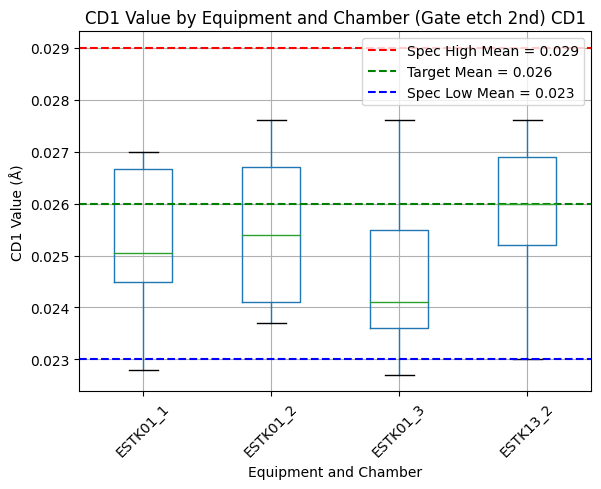

In [150]:

# 'Item_id'= 'CD1'
cd1_data = gate_etch_2nd_merge[gate_etch_2nd_merge['Item_id'] == 'CD1']

# Spec high, Target, Spec low 평균( 한가지 고정 값)
spec_high_mean = cd1_data['Spec high'].mean()
target_mean = cd1_data['Target'].mean()
spec_low_mean = cd1_data['Spec low'].mean()

plt.figure(figsize=(12, 6))
cd1_data.boxplot(column='Value(Å)', by='Equip_Chamber')
plt.title('CD1 Value by Equipment and Chamber (Gate etch 2nd) CD1')
plt.suptitle('')
plt.xlabel('Equipment and Chamber')
plt.ylabel('CD1 Value (Å)')
plt.xticks(rotation=45)

# 평균값을 수평선으로 추가
plt.axhline(spec_high_mean, color='r', linestyle='--', label=f'Spec High Mean = {spec_high_mean:.3f}')
plt.axhline(target_mean, color='g', linestyle='--', label=f'Target Mean = {target_mean:.3f}')
plt.axhline(spec_low_mean, color='b', linestyle='--', label=f'Spec Low Mean = {spec_low_mean:.3f}')

plt.legend()

plt.show()

In [145]:
gate_etch_2nd_CD2_merge=gate_etch_2nd_merge[
    (gate_etch_2nd_merge['Item_id'] == 'CD2') 
   # (gate_etch_2nd_merge['Step_Description_x'] == 'Gate etch 2nd ACI CD')
]
gate_etch_2nd_CD2_merge

,Stepseq,Step_Description_x,Tkin_time,Lot ID,Wafer ID,Item_id,subitem_id,Value(Å),Spec high,Target,Spec low,Equipment ID,Chaber ID,Equip_Chamber,Step_Description_y
5,AB000635,Gate etch 2nd ACI CD,2021-12-08,KZABC.1,5,CD2,average,0.0225,0.024,0.022,0.02,ESTK01,1,ESTK01_1,Gate etch 2nd
11,AB000635,Gate etch 2nd ACI CD,2021-12-09,KZABC.1,14,CD2,average,0.0223,0.024,0.022,0.02,ESTK01,1,ESTK01_1,Gate etch 2nd
17,AB000635,Gate etch 2nd ACI CD,2021-12-10,KZABC.1,9,CD2,average,0.0223,0.024,0.022,0.02,ESTK01,1,ESTK01_1,Gate etch 2nd
23,AB000635,Gate etch 2nd ACI CD,2021-12-11,KZA59.1,2,CD2,average,0.0224,0.024,0.022,0.02,ESTK01,1,ESTK01_1,Gate etch 2nd
29,AB000635,Gate etch 2nd ACI CD,2021-12-12,KZA59.1,15,CD2,average,0.0217,0.024,0.022,0.02,ESTK01,1,ESTK01_1,Gate etch 2nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,AB000635,Gate etch 2nd ACI CD,2022-02-13,KZGFT.1,12,CD2,average,0.0213,0.024,0.022,0.02,ESTK13,2,ESTK13_2,Gate etch 2nd
395,AB000635,Gate etch 2nd ACI CD,2022-02-15,KZGFT.1,4,CD2,average,0.0217,0.024,0.022,0.02,ESTK13,2,ESTK13_2,Gate etch 2nd
401,AB000635,Gate etch 2nd ACI CD,2022-02-16,KZR65.1,1,CD2,average,0.0224,0.024,0.022,0.02,ESTK13,2,ESTK13_2,Gate etch 2nd
407,AB000635,Gate etch 2nd ACI CD,2022-02-17,KZR65.1,6,CD2,average,0.0229,0.024,0.022,0.02,ESTK13,2,ESTK13_2,Gate etch 2nd


In [146]:
gate_etch_2nd_CD2_merge.describe(include='object')

,Stepseq,Step_Description_x,Lot ID,Item_id,subitem_id,Equipment ID,Equip_Chamber,Step_Description_y
count,69,69,69,69,69,69,69,69
unique,1,1,24,1,1,2,4,1
top,AB000635,Gate etch 2nd ACI CD,KZL02.1,CD2,average,ESTK01,ESTK01_3,Gate etch 2nd
freq,69,69,4,69,69,48,25,69


<Figure size 1200x600 with 0 Axes>

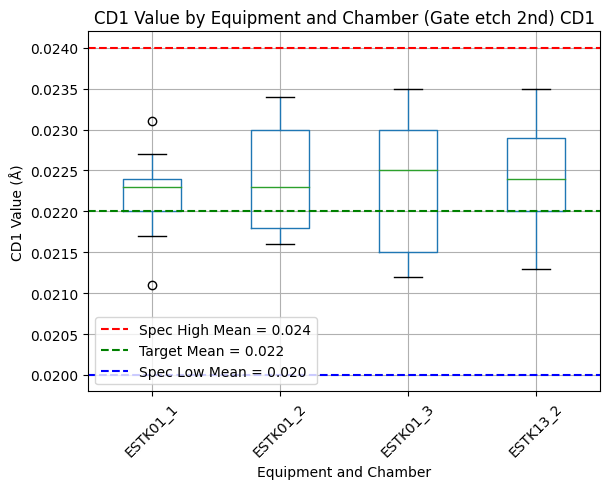

In [147]:

# 'Item_id'= 'CD2'
cd1_data = gate_etch_2nd_merge[gate_etch_2nd_merge['Item_id'] == 'CD2']

spec_high_mean = cd1_data['Spec high'].mean()
target_mean = cd1_data['Target'].mean()
spec_low_mean = cd1_data['Spec low'].mean()

plt.figure(figsize=(12, 6))
cd1_data.boxplot(column='Value(Å)', by='Equip_Chamber')
plt.title('CD1 Value by Equipment and Chamber (Gate etch 2nd) CD1')
plt.suptitle('')
plt.xlabel('Equipment and Chamber')
plt.ylabel('CD1 Value (Å)')
plt.xticks(rotation=45)

plt.axhline(spec_high_mean, color='r', linestyle='--', label=f'Spec High Mean = {spec_high_mean:.3f}')
plt.axhline(target_mean, color='g', linestyle='--', label=f'Target Mean = {target_mean:.3f}')
plt.axhline(spec_low_mean, color='b', linestyle='--', label=f'Spec Low Mean = {spec_low_mean:.3f}')

plt.legend()
plt.show()